In [44]:
import pandas as pd
import numpy as np
df_bank=pd.read_csv('../dataset/BankCustomer.csv')
df_bank.head()

,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited
0,Kan Jian,Female,40,Beijing,9,2,0,1,516,6360.66,0.0000,0
1,Xue Baochai,Male,69,Beijing,6,2,0,1,682,28605.00,0.0000,0
2,Mao Xi,Female,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1
3,Zheng Nengliang,Female,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1
4,Zhi Fen,Male,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1


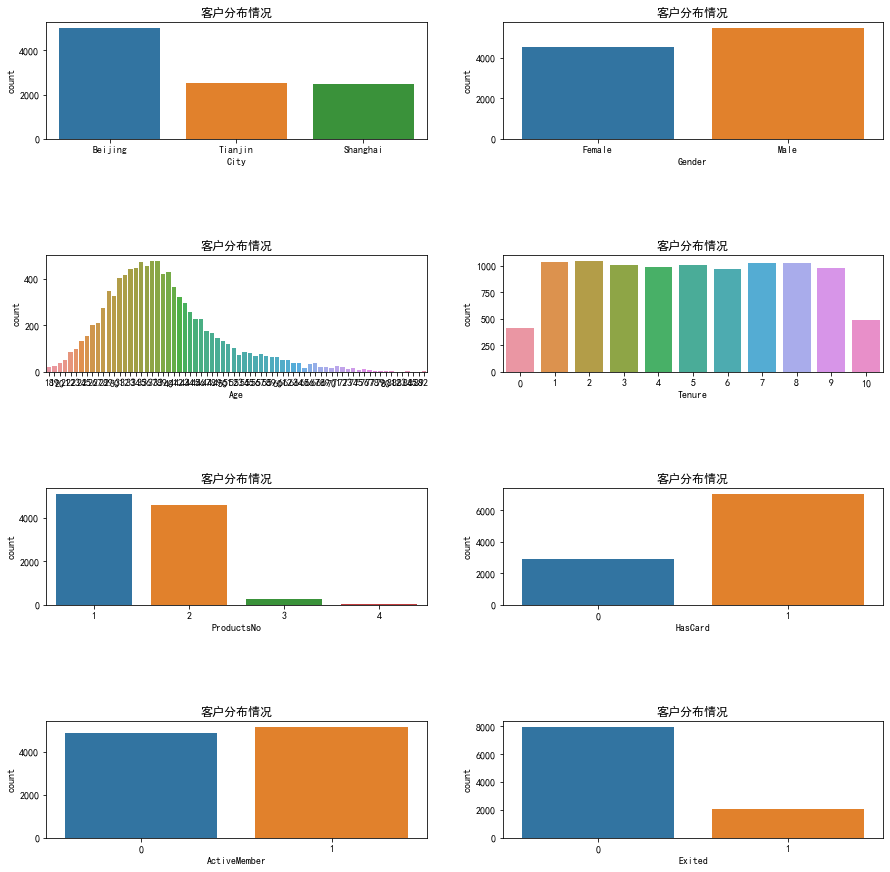

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
features=[ 'City', 'Gender','Age','Tenure','ProductsNo', 'HasCard','ActiveMember', 'Exited']
fig=plt.subplots(figsize=(15,15))

for i,j in enumerate(features):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=df_bank)
    plt.title('客户分布情况')

In [46]:
# 将性别文本数字化
df_bank['Gender'].replace('Female',0,inplace=True)
df_bank['Gender'].replace('Male',1,inplace=True)

print('性别数字：',df_bank['Gender'].unique())

# 将城市文本转化成为多个哑变量
d_city=pd.get_dummies(df_bank['City'],prefix='City')
df_bank=[df_bank,d_city]
df_bank=pd.concat(df_bank,axis=1)
df_bank.head()

性别数字： [0 1]


,Name,Gender,Age,City,Tenure,ProductsNo,HasCard,ActiveMember,Credit,AccountBal,Salary,Exited,City_Beijing,City_Shanghai,City_Tianjin
0,Kan Jian,0,40,Beijing,9,2,0,1,516,6360.66,0.0000,0,1,0,0
1,Xue Baochai,1,69,Beijing,6,2,0,1,682,28605.00,0.0000,0,1,0,0
2,Mao Xi,0,32,Beijing,9,1,1,1,803,10378.09,236311.0932,1,1,0,0
3,Zheng Nengliang,0,37,Tianjin,0,2,1,1,778,25564.01,129909.8079,1,0,0,1
4,Zhi Fen,1,55,Tianjin,4,3,1,0,547,3235.61,136976.1948,1,0,0,1


In [47]:
X=df_bank.drop(['Name','City','Exited'],axis=1)
y=df_bank['Exited']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
#尝试使用逻辑回归预测
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
history=lr.fit(X_train,y_train)
print('逻辑回归准确率:{:.2f}%'.format(lr.score(X_test,y_test)*100))

逻辑回归准确率:78.35%


In [50]:
# 使用Keras单隐层网络预测
import keras
from keras.models import Sequential
from keras.layers import Dense

ann=Sequential()
ann.add(Dense(units=12,input_dim=12,activation='relu'))
ann.add(Dense(units=24,activation="relu"))
ann.add(Dense(units=1,activation='sigmoid'))
ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_16 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


In [51]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# # SVG(model_to_dot(ann,show_shapes=True).create(prog="dot",format="svg"))
# SVG(model_to_dot(ann,show_shapes = True ).create(prog='dot', format='svg'))

In [52]:
# !conda install graphviz

In [53]:
# 编译神经网络，指定优化器，损失函数以及评估指标
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [54]:
# 训练模型
history=ann.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
125/125 [==============================] - 0s 3ms/step - loss: 218.0331 - acc: 0.6261 - val_loss: 72.0347 - val_acc: 0.7460
Epoch 2/30
125/125 [==============================] - 0s 802us/step - loss: 40.7014 - acc: 0.6736 - val_loss: 98.9785 - val_acc: 0.7915
Epoch 3/30
125/125 [==============================] - 0s 803us/step - loss: 49.0228 - acc: 0.6825 - val_loss: 54.5974 - val_acc: 0.7895
Epoch 4/30
125/125 [==============================] - 0s 811us/step - loss: 38.3738 - acc: 0.6839 - val_loss: 8.1387 - val_acc: 0.6905
Epoch 5/30
125/125 [==============================] - 0s 812us/step - loss: 37.4405 - acc: 0.6823 - val_loss: 37.9045 - val_acc: 0.7915
Epoch 6/30
125/125 [==============================] - 0s 800us/step - loss: 39.8050 - acc: 0.6823 - val_loss: 48.4782 - val_acc: 0.5825
Epoch 7/30
125/125 [==============================] - 0s 802us/step - loss: 45.5666 - acc: 0.6784 - val_loss: 49.4174 - val_acc: 0.7915
Epoch 8/30
125/125 [==============================

In [55]:
def show_history(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(1,len(loss)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,'bo',label="训练集损失")
    plt.plot(epochs,val_loss,'b',label="验证集损失")
    plt.title('训练集和验证集损失')
    plt.xlabel('训练轮次')
    plt.ylabel('损失')
    plt.legend()
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    plt.subplot(1,2,2)
    plt.plot(epochs,acc,'bo',label="训练集准确率")
    plt.plot(epochs,val_acc,'b',label="验证集准确率")
    plt.title('训练集和验证集准确率')
    plt.xlabel('训练轮次')
    plt.ylabel('准确率')
    plt.legend()

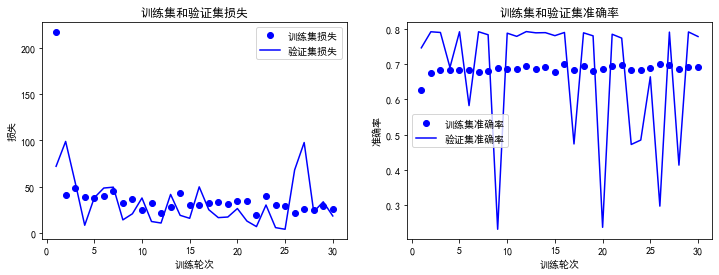

In [56]:
show_history(history)

In [57]:
from sklearn.metrics import classification_report
# 使用分类报告
def show_classfication_report(ann,X_test,y_test):
    y_pred = ann.predict(X_test,batch_size=10)
    y_pred = np.round(y_pred)
    y_test=y_test.values
    y_test=y_test.reshape(len(y_test),1)
    print(classification_report(y_test,y_pred,labels=[0,1]))

In [58]:
show_classfication_report(ann,X_test,y_test)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1583
           1       0.25      0.03      0.06       417

    accuracy                           0.78      2000
   macro avg       0.52      0.50      0.46      2000
weighted avg       0.68      0.78      0.70      2000



In [59]:
from sklearn.metrics import confusion_matrix
# 画出混淆矩阵
def show_confusion_matrix(ann,X_test,y_test):
    y_pred = ann.predict(X_test,batch_size=10)
    y_pred=np.round(y_pred)
    cm=confusion_matrix(y_test,y_pred)
    plt.title('混淆矩阵')
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='d',cbar=False)

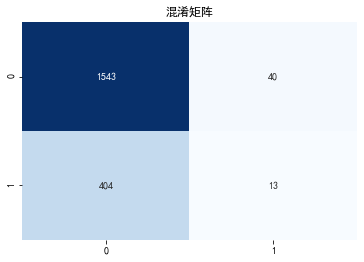

In [60]:
show_confusion_matrix(ann,X_test,y_test)

In [61]:
# 对数据标准化
# mean=X_train.mean(axis=0)
# X_train-=mean
# std=X_train.std(axis=0)
# X_train/=std
# X_test-=mean
# X_test/=std

# 特征缩放

In [62]:
# 使用sklearn 库的工具对数据进行标准化（特征缩放）
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [63]:
#经过特征缩放后，再次使用逻辑回归预测
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
history=lr.fit(X_train,y_train)
print('逻辑回归准确率:{:.2f}%'.format(lr.score(X_test,y_test)*100))

逻辑回归准确率:80.50%


In [64]:
# 经过特征缩放后，重新训练刚才的Keras单隐层网络
history=ann.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4876 - acc: 0.7926 - val_loss: 0.4615 - val_acc: 0.7990
Epoch 2/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4493 - acc: 0.8026 - val_loss: 0.4420 - val_acc: 0.8025
Epoch 3/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4347 - acc: 0.8077 - val_loss: 0.4327 - val_acc: 0.8085
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4262 - acc: 0.8092 - val_loss: 0.4281 - val_acc: 0.8125
Epoch 5/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4210 - acc: 0.8120 - val_loss: 0.4255 - val_acc: 0.8160
Epoch 6/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4175 - acc: 0.8126 - val_loss: 0.4227 - val_acc: 0.8180
Epoch 7/30
125/125 [==============================] - 0s 1ms/step - loss: 0.4138 - acc: 0.8148 - val_loss: 0.4197 - val_acc: 0.8210
Epoch 8/30
125/125 [==============================] - 0s 1ms/step - loss: 0.

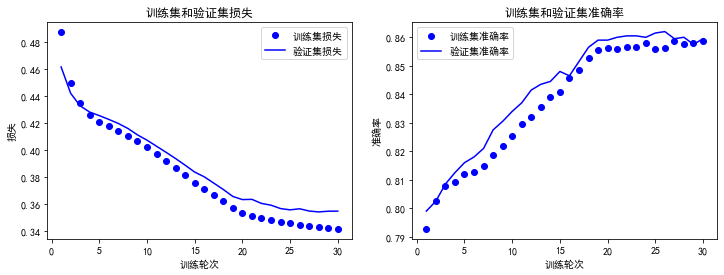

In [65]:
show_history(history)

In [66]:
show_classfication_report(ann,X_test,y_test)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1583
           1       0.78      0.46      0.58       417

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.84      2000



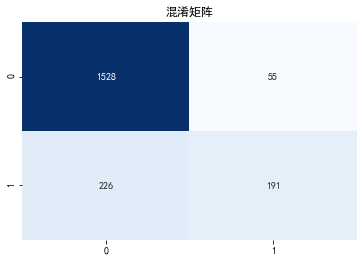

In [67]:
show_confusion_matrix(ann,X_test,y_test)

# 用Keras深度神经网络预测客户流失率

In [68]:
ann2= Sequential()
ann2.add(Dense(units=12,input_dim=12,activation='relu'))
ann2.add(Dense(units=24,activation='relu'))
ann2.add(Dense(units=48,activation='relu'))
ann2.add(Dense(units=96,activation='relu'))
ann2.add(Dense(units=192,activation='relu'))
ann2.add(Dense(units=1,activation='sigmoid'))

ann2.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=['acc'])

In [69]:
history2 = ann.fit(X_train,y_train,batch_size=64,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
125/125 [==============================] - 0s 2ms/step - loss: 0.3409 - acc: 0.8579 - val_loss: 0.3548 - val_acc: 0.8590
Epoch 2/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3404 - acc: 0.8571 - val_loss: 0.3534 - val_acc: 0.8605
Epoch 3/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3402 - acc: 0.8583 - val_loss: 0.3546 - val_acc: 0.8570
Epoch 4/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3393 - acc: 0.8591 - val_loss: 0.3537 - val_acc: 0.8585
Epoch 5/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3389 - acc: 0.8580 - val_loss: 0.3552 - val_acc: 0.8575
Epoch 6/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3385 - acc: 0.8584 - val_loss: 0.3528 - val_acc: 0.8585
Epoch 7/30
125/125 [==============================] - 0s 1ms/step - loss: 0.3382 - acc: 0.8589 - val_loss: 0.3525 - val_acc: 0.8610
Epoch 8/30
125/125 [==============================] - 0s 1ms/step - loss: 0.

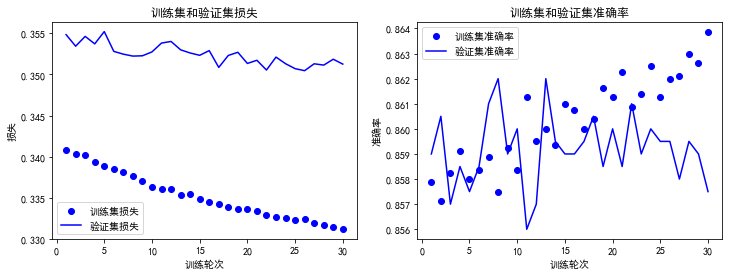

In [70]:
show_history(history2)

In [71]:
show_classfication_report(ann2,X_test,y_test)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1583
           1       0.00      0.00      0.00       417

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# 在神经网络中增加一些Dropout 层，并重新训练它
from keras.layers import Dropout
ann3= Sequential()
ann3.add(Dense(units=12,input_dim=12,activation='relu'))
ann3.add(Dense(units=24,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=48,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=96,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=192,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=1,activation='sigmoid'))
ann3.compile(optimizer='adam',loss="binary_crossentropy",metrics=['acc'])

In [73]:
history3=ann3.fit(X_test,y_test,batch_size=64,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
32/32 [==============================] - 0s 7ms/step - loss: 0.5850 - acc: 0.7750 - val_loss: 0.5613 - val_acc: 0.7915
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5533 - acc: 0.7910 - val_loss: 0.5433 - val_acc: 0.7915
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5363 - acc: 0.7915 - val_loss: 0.5317 - val_acc: 0.7915
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5339 - acc: 0.7915 - val_loss: 0.5226 - val_acc: 0.7915
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5183 - acc: 0.7915 - val_loss: 0.5095 - val_acc: 0.7915
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5145 - acc: 0.7915 - val_loss: 0.5134 - val_acc: 0.7915
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4989 - acc: 0.7915 - val_loss: 0.4981 - val_acc: 0.7915
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.5009 - acc: 0.79

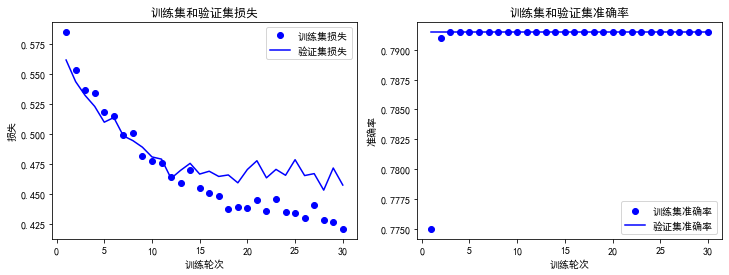

In [74]:
show_history(history3)

In [75]:
show_classfication_report(ann3,X_test,y_test)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1583
           1       0.00      0.00      0.00       417

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


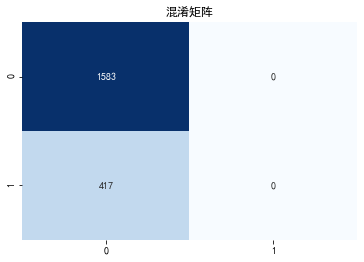

In [76]:
show_confusion_matrix(ann3,X_test,y_test)

# 深度神经网络的调试和性能优化

In [77]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss',patience=20,verbose=1,restore_best_weights=True)
reducerlr = ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1,min_lr=1e-7)
modelckpt = ModelCheckpoint(filepath='ann.h5',monitor='val_loss',verbose=1,save_best_only=True,mode="max")
callbacks=[earlystop,reducerlr,modelckpt]

history4 = ann3.fit(X_train,y_train,batch_size=128,validation_data=(X_test,y_test),epochs=100,callbacks=callbacks)

Epoch 1/100
51/63 [=======================>......] - ETA: 0s - loss: 0.4446 - acc: 0.7984
Epoch 00001: val_loss improved from -inf to 0.48673, saving model to ann.h5
63/63 [==============================] - 0s 3ms/step - loss: 0.4431 - acc: 0.7975 - val_loss: 0.4867 - val_acc: 0.7915
Epoch 2/100
53/63 [========================>.....] - ETA: 0s - loss: 0.4391 - acc: 0.7994
Epoch 00002: val_loss did not improve from 0.48673
63/63 [==============================] - 0s 2ms/step - loss: 0.4383 - acc: 0.7975 - val_loss: 0.4776 - val_acc: 0.7915
Epoch 3/100
52/63 [=======================>......] - ETA: 0s - loss: 0.4406 - acc: 0.7957
Epoch 00003: val_loss did not improve from 0.48673
63/63 [==============================] - 0s 2ms/step - loss: 0.4359 - acc: 0.7975 - val_loss: 0.4618 - val_acc: 0.7915
Epoch 4/100
50/63 [======================>.......] - ETA: 0s - loss: 0.4229 - acc: 0.7994
Epoch 00004: val_loss improved from 0.48673 to 0.48868, saving model to ann.h5
63/63 [===================

## 使用 TensorBoard

In [78]:
# !conda install tensorboard

In [79]:
# 导入并激活TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'kill' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


Reusing TensorBoard on port 6006 (pid 11684), started 1:47:22 ago. (Use '!kill 11684' to kill it.)

In [80]:
!kill 11684

'kill' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [81]:
# 显示TensorBoard
import tensorflow as tf
tensorboard_callback = tf.keras.callbacks.TensorBoard('log')